In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, classification_report, confusion_matrix  

In [2]:
train = pd.read_csv(r"C:\Users\USER\Downloads\train_1.csv")

In [3]:
test = pd.read_csv(r"C:\Users\USER\Downloads\test.csv")

In [4]:
Sample = pd.read_csv(r"C:\Users\USER\Downloads\SampleSubmission.csv")

In [5]:
train.head()

,ID,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted,Age,Location,First_Generation
0,ID_000001,319.0,111.0,4,4.78,4.89,9.51,1,1,26,South America,1
1,ID_000002,327.0,113.0,5,4.24,4.74,10.19,1,1,23,Africa,1
2,ID_000003,323.0,110.0,4,3.43,2.99,8.81,1,1,32,South America,0
3,ID_000004,321.0,105.0,3,3.41,3.38,NaN,0,0,34,Africa,1
4,ID_000005,316.0,108.0,3,NaN,4.80,NaN,1,1,30,North America,1


In [6]:
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Age,Location,First_Generation,ID
0,323.0,110.0,3,3.49,3.72,9.50,1,24,South America,0,ID_003601
1,324.0,111.0,4,4.32,3.84,8.86,1,23,Asia,0,ID_003602
2,311.0,104.0,2,4.38,1.84,7.21,1,24,Asia,1,ID_003603
3,323.0,109.0,4,4.92,3.81,10.00,1,27,North America,0,ID_003604
4,321.0,111.0,4,4.00,5.99,8.59,1,29,North America,1,ID_003605


In [7]:
train.shape

(3600, 12)

In [8]:
test.shape

(900, 11)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3600 non-null   object 
 1   GRE Score          3240 non-null   float64
 2   TOEFL Score        3240 non-null   float64
 3   University Rating  3600 non-null   int64  
 4   SOP                3240 non-null   float64
 5   LOR                3600 non-null   float64
 6   CGPA               3240 non-null   float64
 7   Research           3600 non-null   int64  
 8   Admitted           3600 non-null   int64  
 9   Age                3600 non-null   int64  
 10  Location           3600 non-null   object 
 11  First_Generation   3600 non-null   int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 337.6+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          810 non-null    float64
 1   TOEFL Score        810 non-null    float64
 2   University Rating  900 non-null    int64  
 3   SOP                810 non-null    float64
 4   LOR                900 non-null    float64
 5   CGPA               810 non-null    float64
 6   Research           900 non-null    int64  
 7   Age                900 non-null    int64  
 8   Location           900 non-null    object 
 9   First_Generation   900 non-null    int64  
 10  ID                 900 non-null    object 
dtypes: float64(5), int64(4), object(2)
memory usage: 77.5+ KB


###### Encoding the Location column

In [11]:
train = pd.get_dummies(train, columns=['Location'], drop_first=True)
test = pd.get_dummies(test, columns=['Location'], drop_first=True)

In [12]:
train.isnull().sum()

ID                          0
GRE Score                 360
TOEFL Score               360
University Rating           0
SOP                       360
LOR                         0
CGPA                      360
Research                    0
Admitted                    0
Age                         0
First_Generation            0
Location_Asia               0
Location_Europe             0
Location_North America      0
Location_South America      0
dtype: int64

In [13]:
test.isnull().sum()

GRE Score                 90
TOEFL Score               90
University Rating          0
SOP                       90
LOR                        0
CGPA                      90
Research                   0
Age                        0
First_Generation           0
ID                         0
Location_Asia              0
Location_Europe            0
Location_North America     0
Location_South America     0
dtype: int64

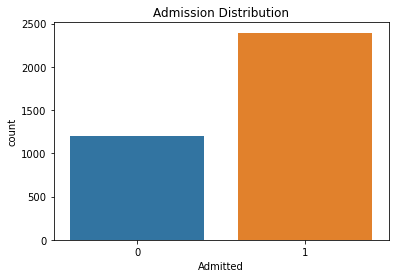

In [14]:
# Distribution of target variable
sns.countplot(x='Admitted', data=train)
plt.title("Admission Distribution")
plt.show()

In [15]:
train['Admitted'].value_counts()

1    2395
0    1205
Name: Admitted, dtype: int64

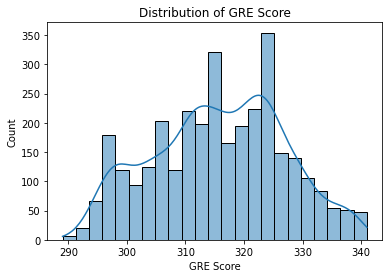

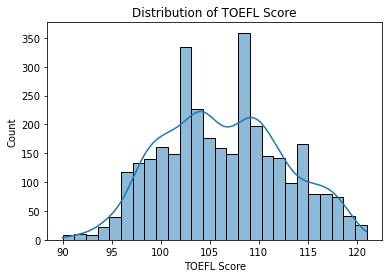

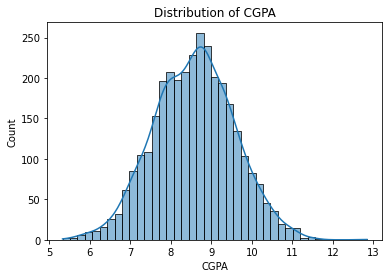

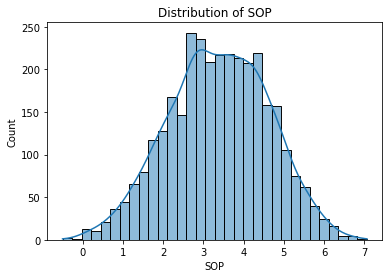

In [16]:
# Plot distributions of key features
num_features = ['GRE Score', 'TOEFL Score', 'CGPA', 'SOP']
for col in num_features:
    sns.histplot(train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


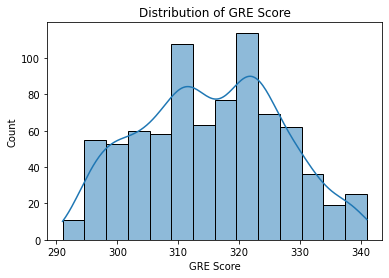

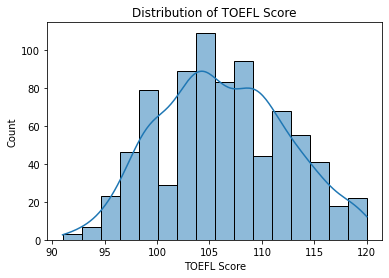

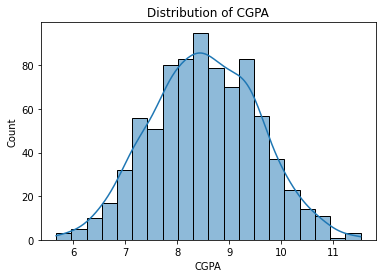

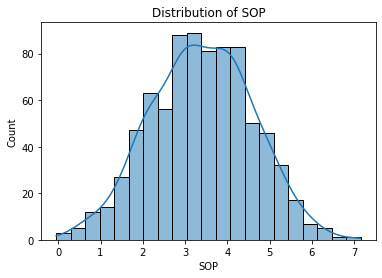

In [17]:
# Plot distributions of key features
num_features = ['GRE Score', 'TOEFL Score', 'CGPA', 'SOP']
for col in num_features:
    sns.histplot(test[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [18]:
# Since the data are normally distributed, I will implemet the mean to handle the missing dataset

In [19]:
# Fill missing numeric values with the mean of each column
numeric_cols = ['GRE Score', 'TOEFL Score', 'SOP', 'CGPA']
train[numeric_cols] = train[numeric_cols].fillna(train[numeric_cols].mean())

In [20]:
train.isnull().sum()

ID                        0
GRE Score                 0
TOEFL Score               0
University Rating         0
SOP                       0
LOR                       0
CGPA                      0
Research                  0
Admitted                  0
Age                       0
First_Generation          0
Location_Asia             0
Location_Europe           0
Location_North America    0
Location_South America    0
dtype: int64

In [21]:
# Fill missing numeric values with the mean of each column
numeric_cols = ['GRE Score', 'TOEFL Score', 'SOP', 'CGPA']
test[numeric_cols] = test[numeric_cols].fillna(train[numeric_cols].mean())

In [22]:
test.isnull().sum()

GRE Score                 0
TOEFL Score               0
University Rating         0
SOP                       0
LOR                       0
CGPA                      0
Research                  0
Age                       0
First_Generation          0
ID                        0
Location_Asia             0
Location_Europe           0
Location_North America    0
Location_South America    0
dtype: int64

In [23]:
train.head()

,ID,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted,Age,First_Generation,Location_Asia,Location_Europe,Location_North America,Location_South America
0,ID_000001,319.0,111.0,4,4.78000,4.89,9.510000,1,1,26,1,0,0,0,1
1,ID_000002,327.0,113.0,5,4.24000,4.74,10.190000,1,1,23,1,0,0,0,0
2,ID_000003,323.0,110.0,4,3.43000,2.99,8.810000,1,1,32,0,0,0,0,1
3,ID_000004,321.0,105.0,3,3.41000,3.38,8.576917,0,0,34,1,0,0,0,0
4,ID_000005,316.0,108.0,3,3.37371,4.80,8.576917,1,1,30,1,0,0,1,0


In [24]:
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Age,First_Generation,ID,Location_Asia,Location_Europe,Location_North America,Location_South America
0,323.0,110.0,3,3.49,3.72,9.50,1,24,0,ID_003601,0,0,0,1
1,324.0,111.0,4,4.32,3.84,8.86,1,23,0,ID_003602,1,0,0,0
2,311.0,104.0,2,4.38,1.84,7.21,1,24,1,ID_003603,1,0,0,0
3,323.0,109.0,4,4.92,3.81,10.00,1,27,0,ID_003604,0,0,1,0
4,321.0,111.0,4,4.00,5.99,8.59,1,29,1,ID_003605,0,0,1,0


In [25]:
#Standardizing my dataset

In [26]:
scaler = StandardScaler()

In [33]:
#scaler.fit_transform(train[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Age']])

In [37]:
cols = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Age']
train[cols] = scaler.fit_transform(train[cols])

In [36]:
print(train.columns.tolist())

['ID', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Admitted', 'Age', 'First_Generation', 'Location_Asia', 'Location_Europe', 'Location_North America', 'Location_South America']


In [40]:
#Moving the ID column to the first column
test_cols = test.columns.tolist()
test_cols.insert(0,test_cols.pop(test_cols.index('ID')))
test = test[test_cols]

In [41]:
test.head()

,ID,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Age,First_Generation,Location_Asia,Location_Europe,Location_North America,Location_South America
0,ID_003601,323.0,110.0,3,3.49,3.72,9.50,1,24,0,0,0,0,1
1,ID_003602,324.0,111.0,4,4.32,3.84,8.86,1,23,0,1,0,0,0
2,ID_003603,311.0,104.0,2,4.38,1.84,7.21,1,24,1,1,0,0,0
3,ID_003604,323.0,109.0,4,4.92,3.81,10.00,1,27,0,0,0,1,0
4,ID_003605,321.0,111.0,4,4.00,5.99,8.59,1,29,1,0,0,1,0


In [43]:
col = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Age']
test[col] = scaler.fit_transform(test[col])

In [44]:
test.head()

,ID,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Age,First_Generation,Location_Asia,Location_Europe,Location_North America,Location_South America
0,ID_003601,0.700168,0.645939,0.110127,0.090241,0.184441,1.007619,1,-0.775470,0,0,0,0,1
1,ID_003602,0.792111,0.820918,1.011164,0.820053,0.286961,0.342461,1,-0.994736,0,1,0,0,0
2,ID_003603,-0.403156,-0.403938,-0.790910,0.872811,-1.421707,-1.372399,1,-0.775470,1,1,0,0,0
3,ID_003604,0.700168,0.470959,1.011164,1.347628,0.261331,1.527274,1,-0.117673,0,0,0,1,0
4,ID_003605,0.516280,0.820918,1.011164,0.538680,2.123780,0.061848,1,0.320859,1,0,0,1,0


In [50]:
from xgboost import XGBClassifier

In [48]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [51]:
# Features and target
X = train.drop(columns=['Admitted', "ID"], axis=1)
y = train['Admitted']

# Split into train/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_val.shape


((2880, 13), (720, 13))

In [52]:
#list of models
models = [LogisticRegression(), SVC(kernel='linear'), KNeighborsClassifier(), GradientBoostingClassifier(), XGBClassifier(),DecisionTreeClassifier() ]

In [55]:
def compare_models():
    for model in models:
        cv_score = cross_val_score(model, X, y, cv=5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy = mean_accuracy*100
        mean_accuracy = round(mean_accuracy,2)
        
        print('Cross validation accuracy for the', model, '=', cv_score)
        print('Accuracy score of the', model,'=',mean_accuracy,'%')
        print('--------------------------------------------------')

In [56]:
compare_models()

Cross validation accuracy for the LogisticRegression() = [0.85555556 0.85555556 0.85       0.85416667 0.825     ]
Accuracy score of the LogisticRegression() = 84.81 %
--------------------------------------------------
Cross validation accuracy for the SVC() = [0.85694444 0.86388889 0.84861111 0.85416667 0.81805556]
Accuracy score of the SVC() = 84.83 %
--------------------------------------------------
Cross validation accuracy for the KNeighborsClassifier() = [0.81388889 0.84027778 0.83055556 0.82361111 0.79722222]
Accuracy score of the KNeighborsClassifier() = 82.11 %
--------------------------------------------------
Cross validation accuracy for the GradientBoostingClassifier() = [0.8625     0.86388889 0.85972222 0.85833333 0.84444444]
Accuracy score of the GradientBoostingClassifier() = 85.78 %
--------------------------------------------------
Cross validation accuracy for the XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsa

In [57]:
#Using Hyperparameter tuning

In [58]:
models_list = [LogisticRegression(), SVC(), KNeighborsClassifier(), GradientBoostingClassifier(), XGBClassifier(),DecisionTreeClassifier() ]

In [59]:
model_hyperparameters = {
    'log_reg_hyperparameters': {
        'C' :[1,5,10,20]
    },
    'SVC_hyperparameters':{
        'kernel':['linear','poly','rbf','sigmoid'],
        'C':[1,5,10,20]
    },
    'KNN_hyperparameters':{
        'n_neighbors' : [3,5,10]
    },
    'Gradientboosting_hyperparameters':{
        'n_estimators': [100,200],
        'learning_rate':[0.05,0.1],
        'max_depth':[3,5]
    },
    'XGBClassifier_hyperparameters':{
        'n_estimators':[100,200],
        'learning_rate':[0.05, 0.1],
        'max_depth':[3,5]
    },
    'Decision Tree':{
        'max_depth':[3,5,10,None],
        'min_samples_split':[2,5,10]
    }
}

In [60]:
from sklearn.metrics import make_scorer

In [61]:
f1 = make_scorer(f1_score)

In [63]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'SVC_hyperparameters', 'KNN_hyperparameters', 'Gradientboosting_hyperparameters', 'XGBClassifier_hyperparameters', 'Decision Tree']


In [67]:
#Applying GridSearchCV
def ModelSelection(list_of_models, hyper_dict):
    result=[]
    i = 0
    for model in list_of_models:
        key =  model_keys[i]
        params = hyper_dict[key]
        i+=1
        
        print(model)
        print(params)
        print('------------------')
        
        classifier = GridSearchCV(model,params,cv=5)
        #fitting the data to classifier
        classifier.fit(X,y)
        result.append({
            'model used':model,
            'highest score':classifier.best_score_,
            'best_hyperparameters':classifier.best_params_
        })
    
    result_dataframe =pd.DataFrame(result,columns =['model used','highest score','best_hyperparameters'])
    return result_dataframe
    

In [69]:
ModelSelection(models_list,model_hyperparameters)

LogisticRegression()
{'C': [1, 5, 10, 20]}
------------------
SVC()
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
------------------
GradientBoostingClassifier()
{'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              mu

,model used,highest score,best_hyperparameters
0,LogisticRegression(),0.848333,{'C': 5}
1,SVC(),0.848611,"{'C': 5, 'kernel': 'rbf'}"
2,KNeighborsClassifier(),0.836389,{'n_neighbors': 10}
3,GradientBoostingClassifier(),0.868333,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
4,"XGBClassifier(base_score=None, booster=None, c...",0.867500,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est..."
5,DecisionTreeClassifier(),0.838889,"{'max_depth': 5, 'min_samples_split': 5}"
